In [151]:
#standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [152]:
#actual dataset is quite large, so first looking at filters first
#a glance at all these they can be imported as categories to save memory
indicators = pd.read_csv('ZILLOW_INDICATORS.csv')
regions = pd.read_csv('ZILLOW_REGIONS.csv')
print(indicators.head(),indicators.info())
print(regions.head(),regions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   indicator_id  56 non-null     object
 1   indicator     56 non-null     object
 2   category      56 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB
  indicator_id                                          indicator  \
0         SAAW  Median Sale Price (Smooth & Seasonally Adjuste...   
1         SRAM        Median Sale Price (Raw, All Homes, Monthly)   
2         NSAM  Median Days to Pending (Smooth, All Homes, Mon...   
3         RSNA  ZORI (Smoothed): All Homes Plus Multifamily Ti...   
4         RSSA  ZORI (Smoothed, Seasonally Adjusted): All Home...   

              category  
0  Inventory and sales  
1  Inventory and sales  
2  Inventory and sales  
3              Rentals  
4              Rentals   None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89305 entries, 0 to 89304
Da

In [153]:
#based on info, we can set indexes with id columns and change types to categories for others
indicators = indicators.astype({'indicator_id': 'string', 'indicator': 'category', 'category': 'category'})
regions = regions.astype({'region_type': 'category', 'region': 'category'})
indicators.set_index('indicator_id')
regions.set_index('region_id')
print(indicators)
print(regions)

   indicator_id                                          indicator  \
0          SAAW  Median Sale Price (Smooth & Seasonally Adjuste...   
1          SRAM        Median Sale Price (Raw, All Homes, Monthly)   
2          NSAM  Median Days to Pending (Smooth, All Homes, Mon...   
3          RSNA  ZORI (Smoothed): All Homes Plus Multifamily Ti...   
4          RSSA  ZORI (Smoothed, Seasonally Adjusted): All Home...   
5          ZATT           ZHVI All Homes- Top Tier Time Series ($)   
6          ZSFH           ZHVI Single-Family Homes Time Series ($)   
7          ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
8          ZCON                   ZHVI Condo/Co-op Time Series ($)   
9          ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
10         Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
11         Z2BR                     ZHVI 2-Bedroom Time Series ($)   
12         Z3BR                     ZHVI 3-Bedroom Time Series ($)   
13         Z1BR     

In [154]:
#based  on the indicators, we'll start with pulling data just for the 'home values' category
home_values_indicators = indicators[indicators['category'] == 'Home values'].copy()
print(home_values_indicators)

   indicator_id                                          indicator  \
5          ZATT           ZHVI All Homes- Top Tier Time Series ($)   
6          ZSFH           ZHVI Single-Family Homes Time Series ($)   
7          ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
8          ZCON                   ZHVI Condo/Co-op Time Series ($)   
9          ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
10         Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
11         Z2BR                     ZHVI 2-Bedroom Time Series ($)   
12         Z3BR                     ZHVI 3-Bedroom Time Series ($)   
13         Z1BR                     ZHVI 1-Bedroom Time Series ($)   
14         Z4BR                     ZHVI 4-Bedroom Time Series ($)   

       category  
5   Home values  
6   Home values  
7   Home values  
8   Home values  
9   Home values  
10  Home values  
11  Home values  
12  Home values  
13  Home values  
14  Home values  


In [155]:
#the zillow_data csv is quite large, so we'll bring in a sample subset 
df = pd.read_csv('ZILLOW_DATA.csv',nrows=500)
print(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   indicator_id  500 non-null    object 
 1   region_id     500 non-null    int64  
 2   date          500 non-null    object 
 3   value         500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB
  indicator_id  region_id        date     value
0         ZATT       3101  1998-01-31  338849.0
1         ZATT       3101  1998-02-28  342993.0
2         ZATT       3101  1998-03-31  346763.0
3         ZATT       3101  1998-04-30  349356.0
4         ZATT       3101  1998-05-31  351981.0 None


In [156]:
#from this sample subset we can change some subtypes and parse by date when reading a bigger portion of the csv in
#we will also only want to read in the home value category, which we will need a function for
home_values = pd.read_csv('ZILLOW_DATA.csv',dtype={'indicator_id':'category', 'region_id':'category'}, parse_dates=['date'])
print(home_values.head(),home_values.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159415321 entries, 0 to 159415320
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   indicator_id  category      
 1   region_id     category      
 2   date          datetime64[ns]
 3   value         float64       
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 3.1 GB
  indicator_id region_id       date     value
0         ZATT      3101 1998-01-31  338849.0
1         ZATT      3101 1998-02-28  342993.0
2         ZATT      3101 1998-03-31  346763.0
3         ZATT      3101 1998-04-30  349356.0
4         ZATT      3101 1998-05-31  351981.0 None


In [157]:
home_values = home_values[home_values['indicator_id'].isin(home_values_indicators['indicator_id'])]
print(home_values.head(),home_values.info())

<class 'pandas.core.frame.DataFrame'>
Index: 151462324 entries, 0 to 159415277
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   indicator_id  category      
 1   region_id     category      
 2   date          datetime64[ns]
 3   value         float64       
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 4.1 GB
  indicator_id region_id       date     value
0         ZATT      3101 1998-01-31  338849.0
1         ZATT      3101 1998-02-28  342993.0
2         ZATT      3101 1998-03-31  346763.0
3         ZATT      3101 1998-04-30  349356.0
4         ZATT      3101 1998-05-31  351981.0 None


In [168]:
#lets get yearly mean/median data. with some larger values within the dataset, median may be more accurate, so we will look at both
print(home_values['indicator_id'].unique())
home_values['year'] = home_values['date'].dt.year
summary_yr = home_values.groupby('year')['value'].agg(['mean','median']).reset_index()
summary_yr = summary_yr.round({'mean': 2, 'median': 0})
print(summary_yr)

['ZATT', 'Z1BR', 'Z3BR', 'Z4BR', 'ZSFH', 'Z5BR', 'ZCON', 'Z2BR', 'ZALL', 'ZABT']
Categories (56, object): ['Z1BR', 'Z3BR', 'Z4BR', 'Z5BR', ..., 'SRSM', 'SRSW', 'SSAM', 'SSSM']
    year       mean    median
0   1996  141338.20  115749.0
1   1997  145422.93  118913.0
2   1998  151442.68  122628.0
3   1999  158770.94  126769.0
4   2000  164579.61  127276.0
5   2001  177784.87  134446.0
6   2002  189621.28  141862.0
7   2003  203745.02  149987.0
8   2004  222609.07  161130.0
9   2005  236202.26  165703.0
10  2006  249244.23  172564.0
11  2007  248483.75  174611.0
12  2008  229492.14  164595.0
13  2009  210390.38  153223.0
14  2010  202983.33  147192.0
15  2011  193494.36  139802.0
16  2012  191936.98  138172.0
17  2013  202626.02  143054.0
18  2014  214365.32  148964.0
19  2015  223739.62  153842.0
20  2016  233507.22  160412.0
21  2017  244244.34  168065.0
22  2018  258116.77  177231.0
23  2019  267361.99  186368.0
24  2020  279588.73  197407.0
25  2021  321060.83  225715.0
26  2022  3873

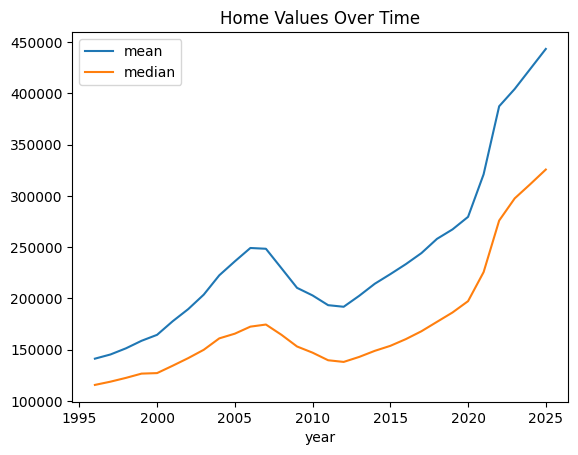

In [169]:
#quick graph of mean, median over time for all home values
summary_yr.plot(x='year', y=['mean', 'median'])
plt.title('Home Values Over Time')
plt.show()

In [170]:
#lets do summary stats by year and and indicator
summary_by_category = home_values.groupby(['year','indicator_id'])['value'].agg(['mean', 'median']).reset_index()
print(summary_by_category.head(),summary_by_category.info())


/var/folders/70/rltmkfk55jdbrj33c3tvy2jr0000gn/T/ipykernel_34988/3131142097.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_by_category = home_values.groupby(['year','indicator_id'])['value'].agg(['mean', 'median']).reset_index()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          1680 non-null   int32   
 1   indicator_id  1680 non-null   category
 2   mean          300 non-null    float64 
 3   median        300 non-null    float64 
dtypes: category(1), float64(2), int32(1)
memory usage: 37.1 KB
   year indicator_id           mean    median
0  1996         Z1BR   99020.626156   86937.0
1  1996         Z3BR  129600.557648  110795.0
2  1996         Z4BR  167689.078100  142835.0
3  1996         Z5BR  222678.336188  182886.0
4  1996         ZATT  192613.989002  159049.0 None


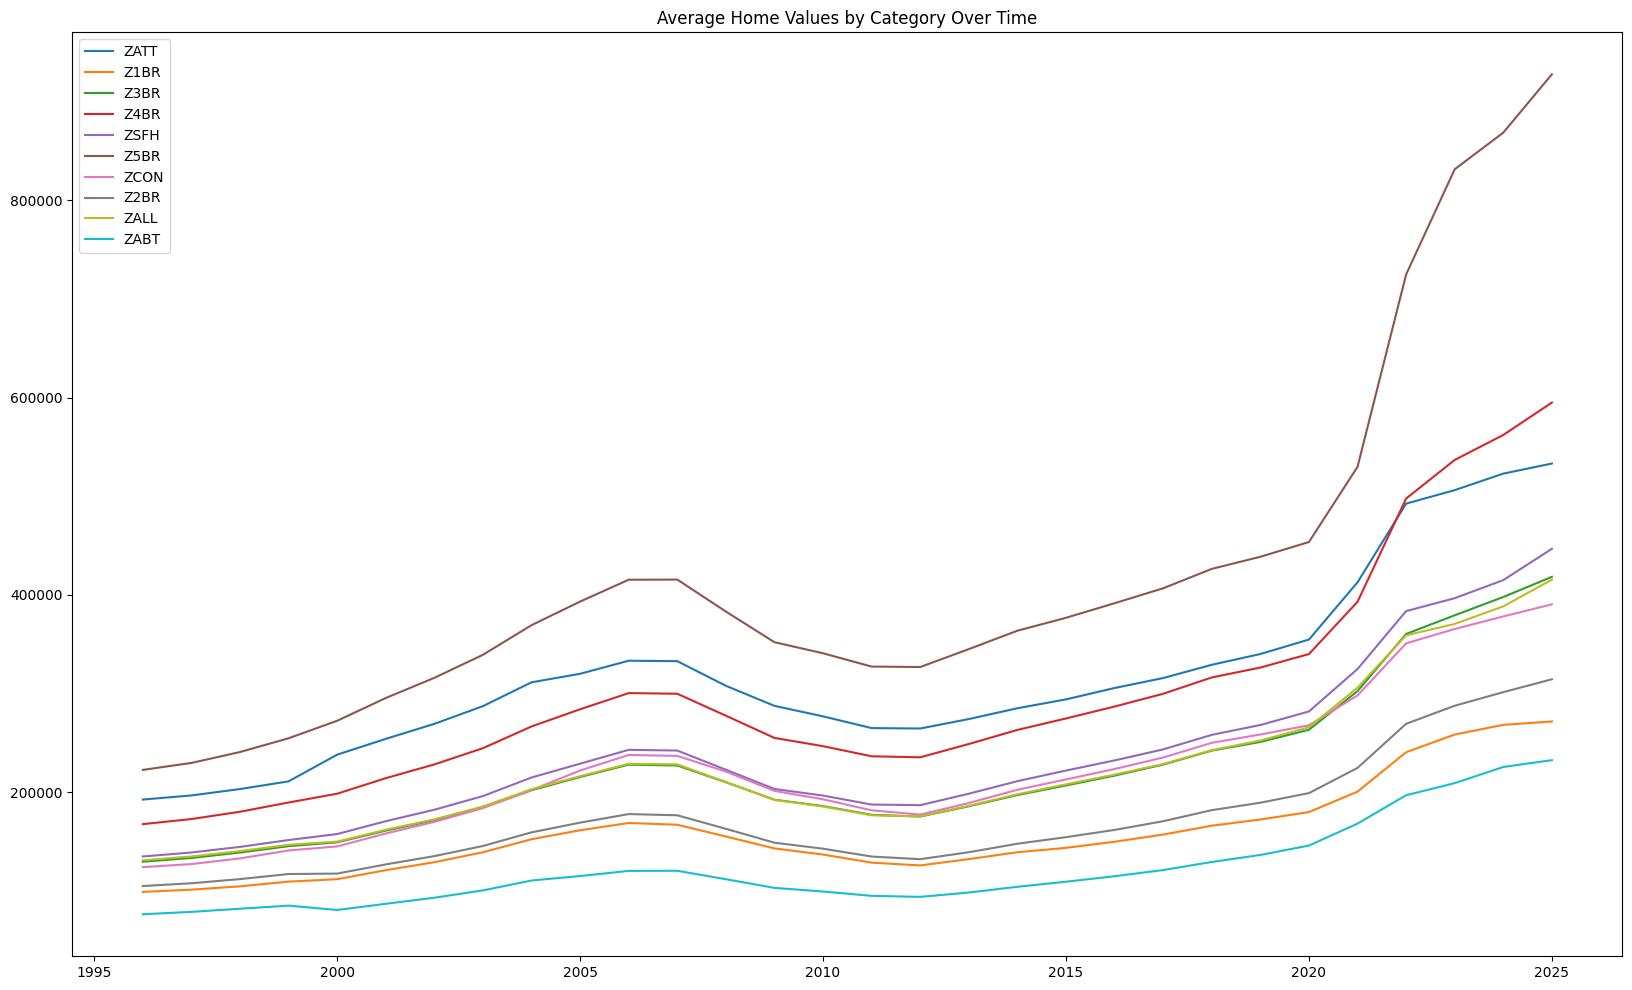

In [171]:
temp_df = pd.DataFrame()
fig, ax = plt.subplots(figsize=(20,12))
for indicator in home_values['indicator_id'].unique():
    temp_df = summary_by_category[summary_by_category['indicator_id'] == indicator]
    ax.plot('year', 'mean', data=temp_df, label = indicator)
plt.title('Average Home Values by Category Over Time')
plt.legend()
plt.show()